## Enterprise View

As a DBA, I need an overview of resource consumption of enterprise databases to check performance problems, and find out top databases that showing high resource consumption. Here are examples of getting data from Repository Views with CPU consumption, Logical Reads, Physical Reads, Memory Usage, and Activity Response Time as health indicators for a given interval. From the following examples, we can find out how resources are being used across the enterprise, and the general availability of those resources.

* Resource consumption by hour
* CPU utilization by hour
* Memory usage by hour
* Top CPU
* Top Memory


### Step 1. Load Db2 Extension
Before running all the following examples, you need to load the Db2 extention so that you can use the magic command `%sql`.

The cell below will load the Db2 extension. Note that it will take a few seconds for the extension to load, so you need to wait till the message "Db2 Extensions Loaded" is displayed. You can find more information about the Db2 extension at https://github.com/DB2-Samples/db2jupyter.

In [2]:
%run db2.jupyter.ipynb

Pixiedust database opened successfully


DB2 Extensions Loaded.


### Step 2. Connect to Db2
Before you run any SQL commands, you must create a connection to your target database by using the following command syntax:

     %sql CONNECT TO [db_name] USER [user_name] USING [password]|[?] HOST [IP_address] PORT [port]

   * db_name - Database name to be connected. Use your DSM repository database name as the input.
   * user_name - User ID to connect to the database.
   * password - If `?` is used for the password, you must manully input the password when prompted.
   * IP_address - Use `localhost` or IP address if you are connecting to a remote server.
   * port - Port number to connect your database
    
The message "Connection successful" will be displayed when the connection is created successfully. 

You can update the connection parameters and credential to another database if necessary.

In [22]:
%sql CONNECT TO dsxdemo USER db2inst1 USING ? HOST 9.30.253.63 PORT 50002

Password [password]: ········
Connection successful.


### Parameter Description 
In each of the following examples, we use the `queryCondition` keyword to pass the values of the following parameters in order to pull history data through the repository view:
* DB_CONN_ID: Connection names of monitor databases that you add to DSM. The connection names must be sperated by using the `,` character. You can use the `*` wild card for all the connections in the DSM.
* END_TIME: Target end time you want to query.
* INTERVAL: int(1~100), stands for time period(hours) before the END_TIME.
* REPORT_TYPE: 4 report types(case-insensitive): Resource / CPU / Memory / All
    1. Resource: includes metrics for CPU time consumed in microseconds, Logical Reads, Phyiscal Reads, number of queries, and average database response time.
    2. CPU: includes metrics for CPU time consumed by system and data server.
    3. Memory: shows the maximum memory used by database.
    4. All: shows all reports including Resource, CPU, and Memory.

Format of input: 
* queryCondition = "DB_CONN_ID='irww,sample,testdb1' END_TIME='2018-01-05-00:00:00' INTERVAL=18 REPORT_TYPE='all'"

Note: 
1. All parameters must be separated by a whitespace.
2. Multiple connection names can be specified to the parameter DB_CONN_ID by using the `,` character as the separator.
2. If the value of any parameter is changed, you must click [Save and Checkpoint] to save the changes before running the `%run` command.

You can find the details of the implementation in the notebook `enterprise-view-scripts.jupyter.ipynb`.


### Example 1: 
This example shows how to use SQL statements to get CPU Time, Logical Reads, Physical Reads, and Activity Time from the Repository view THROUGHPUT_ALL for multiple databases.
* CPU_SEC: CPU time consumed in microseconds. In this example, the CPU time is scaled to seconds.
* LOGICAL_READS and PHYSICAL_READS: Measure of I/O consumed by a database.
* ACTIVITIES: The number of queries that were running against the database.
* AVG_ACTIVITY_TIME_MSEC: Average database response time for all activities, including SQL execution, I/O, and lock waits.

For resource(Logical Reads): The query result is empty for the database connection sample_113, please check your query parameters.

For resource(Logical Reads): The query result is empty for the database connection testdb, please check your query parameters.



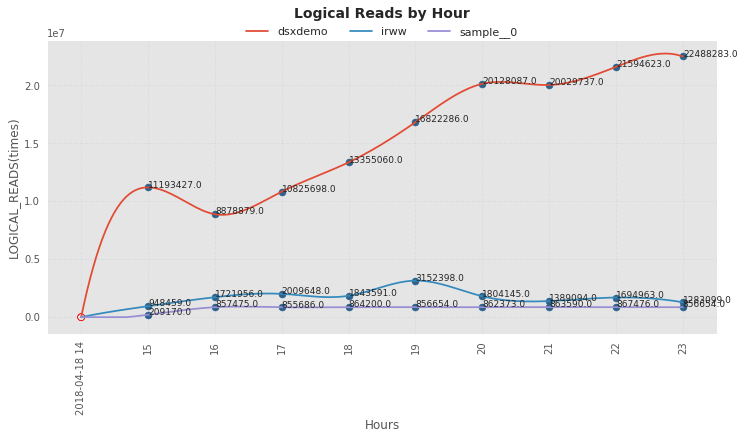

For resource(Physical Reads): The query result is empty for the database connection sample_113, please check your query parameters.

For resource(Physical Reads): The query result is empty for the database connection testdb, please check your query parameters.



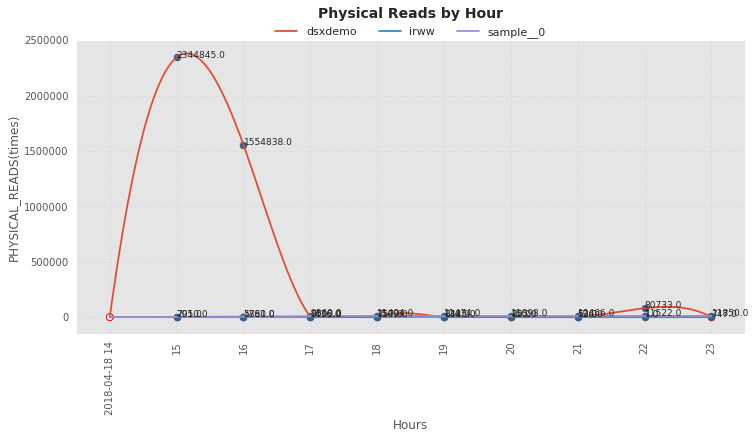

For resource(CPU_SEC): The query result is empty for the database connection sample_113, please check your query parameters.

For resource(CPU_SEC): The query result is empty for the database connection testdb, please check your query parameters.



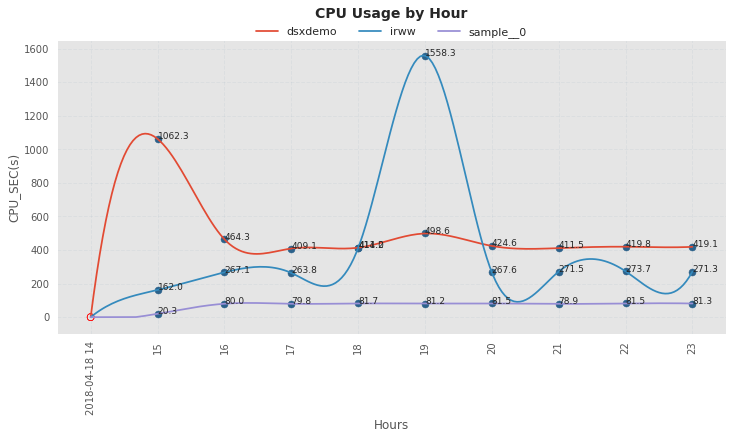

For resource(AVG_ACTIVITY_TIME_MSEC): The query result is empty for the database connection sample_113, please check your query parameters.

For resource(AVG_ACTIVITY_TIME_MSEC): The query result is empty for the database connection testdb, please check your query parameters.



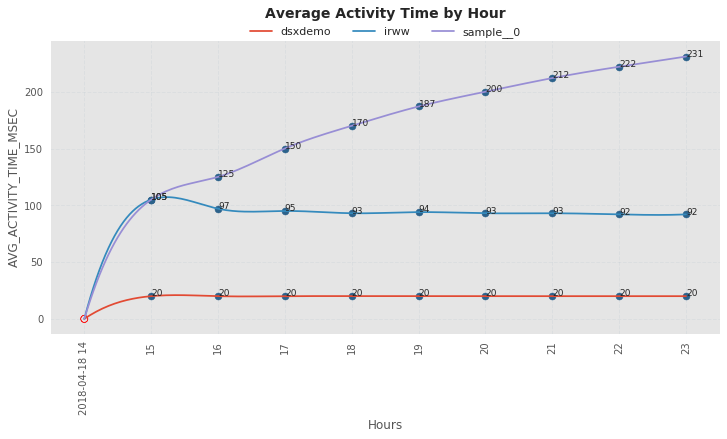

ACTIVITIES  \
DATE       HOURS CONN_NAME                                    
2018-04-18 15    dsxdemo                            1148382   
                 irww                                106335   
                 sample__0                            14449   
           16    dsxdemo                            1016351   
                 irww                                232341   
                 sample__0                            58896   
           17    dsxdemo                            1016602   
                 irww                                239362   
                 sample__0                            57821   
           18    dsxdemo                            1021864   
                 irww                                228597   
                 sample__0                            58197   
           19    dsxdemo                            1046098   
                 irww                                229998   
                 sample__0                            57950   
           20    dsxdemo                            1019451   
                 irww                                239189   
                 sample__0                            58474   
           21    dsxdemo                            1014078   
                 irww                                228439   
                 sample__0                            57937   
           22    dsxdemo                            1010538   
                 irww                                239371   
                 sample__0                            58751   
           23    dsxdemo                            1007849   
                 irww                                228305   
                 sample__0                            57981   

                                                 AVG_ACTIVITY_TIME_MSEC  \
DATE       HOURS CONN_NAME                                                
2018-04-18 15    dsxdemo                                             20   
                 irww                                                82   
                 sample__0                                          355   
           16    dsxdemo                                             20   
                 irww                                                91   
                 sample__0                                          347   
           17    dsxdemo                                             19   
                 irww                                                87   
                 sample__0                                          353   
           18    dsxdemo                                             19   
                 irww                                                92   
                 sample__0                                          351   
           19    dsxdemo                                             19   
                 irww                                               100   
                 sample__0                                          352   
           20    dsxdemo                                             19   
                 irww                                                87   
                 sample__0                                          349   
           21    dsxdemo                                             20   
                 irww                                                91   
                 sample__0                                          353   
           22    dsxdemo                                             20   
                 irww                                                87   
                 sample__0                                          348   
           23    dsxdemo                                             20   
                 irww                                                91   
                 sample__0                                          352   

                                             

In [23]:
# load pandas for dataframe support
import pandas as pd

# input value of parameters to pull history data through repository view
queryCondition = "DB_CONN_ID='*' END_TIME='2018-04-19-00:00:00' INTERVAL=10 REPORT_TYPE='resource'"

# pass the values to a variable
!echo $queryCondition > enterpriseCondition

# get content from the variable and pass values to select statement 
# run select statment to get resource consumption data for multiple connections and save as a CVS file
# display one metric for multiple connections in one graph
# display CPU Usage, Logical Reads, Physical Reads, Average Activity Time in graph
%run enterprise-view-scripts.jupyter.ipynb

# set maximum rows of a table as general
pd.options.display.max_rows = 999

# define object for dataframe and pivot table
resource_df = None
resource_table = None

# check whether a CSV file has been created, which means the select statement runs successfully
# pass content of the CSV to dataframe object
# draw pivot table according to dataframe
if os.path.exists("resource.csv") and (len(GENERAL_ERROR) == 0):
    resource_df = pd.read_csv("resource.csv", index_col=0)
    resource_table = pd.pivot_table(resource_df, index = ['DATE', 'HOURS', 'CONN_NAME'], fill_value=0)
    
# display pivot table    
resource_table

## Step 3. Connect to Another Repository database

In the following Example 2 and Example 3, we use another repository database to demostrate.
You need to create a connection to the other database by using the following command syntax again:

 %sql CONNECT TO [db_name] USER [user_name] USING [password]|[?] HOST [IP_address] PORT [port]

The message "Connection successful" will be displayed when the connection is created successfully.


In [ ]:
%sql CONNECT TO test213 USER db2inst1 USING ? HOST 9.30.253.63 PORT 50002

### Example 2: 
This example shows connection names with the top CPU consumption among all the monitored databases by week. You can find out the answer to a question like "What the top 10 databases with the highest CPU consumption are in the 1st week of January?”
* CPU_SEC: CPU time consumed in microseconds. In this example, the CPU time is scaled to seconds.

We display the result in 2 graphs.
* Weekly Top 5 CPU consumption: x-Axis stands for week; y-Axis stands for rank; size of the circle stands for the frequency of a database shows in Top 5 of the queried weeks. From this graph, you can find out which databases are top 5 and their rank in a week, and how many times they are in top 5 in the queried weeks
* Top CPU consumption Map: x-Axis shows how many times of a database shows in Top 5; y-Axis shows the average rank of a database(each rank has its weight, average rank=SUM(weight)/(Times in Top 5)); size of the circle stands for the average CPU consumption of a database ever shows in Top 5

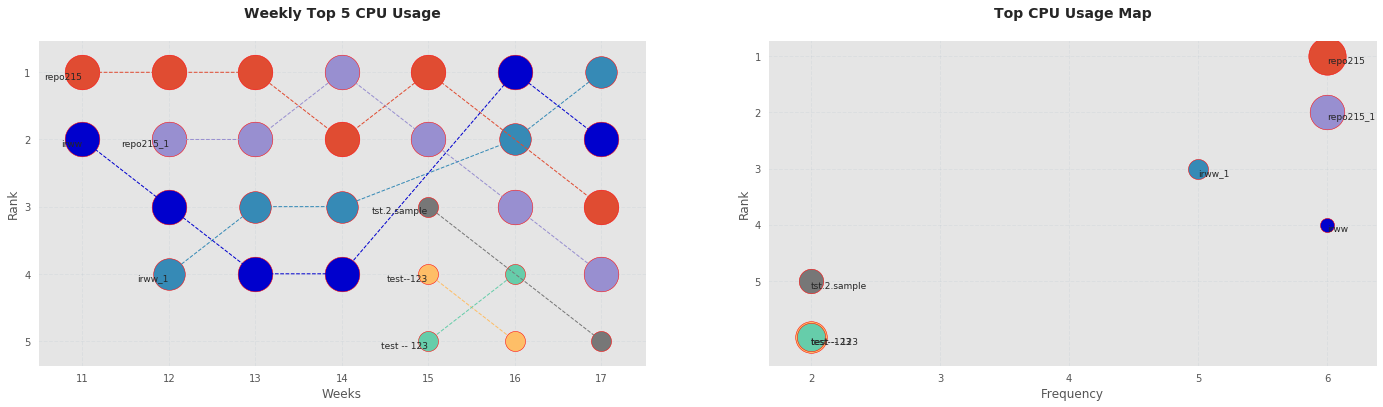

CPU_SEC  RANK
MONTH WEEK CONN_NAME                    
3     11   irww            1651.93     2
           repo215       196199.75     1
      12   irww            7762.44     3
           irww_1          4055.88     4
           repo215       312676.62     1
           repo215_1     108091.54     2
      13   irww           12572.60     4
           irww_1         12580.83     3
           repo215        34931.66     1
           repo215_1      34430.16     2
4     14   irww            3965.15     4
           irww_1          4734.39     3
           repo215        14191.94     2
           repo215_1      14191.94     1
      15   repo215        30411.51     1
           repo215_1      30400.05     2
           test -- 123    19896.96     5
           test--123      19916.36     4
           tst.2.sample   27129.03     3
      16   irww           39860.73     1
           irww_1         38268.31     2
           repo215_1      30139.67     3
           test -- 123    30138.35     4
           test--123      30137.75     5
      17   irww           51716.84     2
           irww_1         51724.49     1
           repo215        21473.00     3
           repo215_1      21472.53     4
           tst.2.sample   21472.21     5

In [18]:
# load pandas for dataframe support
import pandas as pd

# input value of parameters to pull history data through repository view
queryCondition = "DB_CONN_ID='*' END_TIME='2018-04-24-00:00:00' INTERVAL=30 REPORT_TYPE='CPU'"

# pass the values to a variable
!echo $queryCondition > enterpriseCondition

# get content from the variable and pass values to select statement 
# run select statment to get Top 5 databases that were showing high CPU consumption by week and save as a CSV file
# display Top 5 databases that were showing high CPU consumption in each week in graph
%run enterprise-view-scripts.jupyter.ipynb

# set maximum rows of a table as general
pd.options.display.max_rows = 999

# define object for dataframe and pivot table
cpu_df = None
cpu_table = None

# check whether a CSV file has been created, which means select statement runs successfully
# pass content of CSV to dataframe object
# draw pivot table according to dataframe
if os.path.exists("cpu.csv") and (len(GENERAL_ERROR) == 0):
    cpu_df = pd.read_csv("cpu.csv", index_col=0)
    cpu_table = pd.pivot_table(cpu_df, index = ['MONTH', 'WEEK', 'CONN_NAME'], fill_value=0)
    
# display pivot table    
cpu_table

### Example 3:

This example shows connection names with the top memory consumption among all the monitored databases by week. You can find out the answer to a question like "What the top 10 databases with the highest memory consumption are in the 1st week of January?”
   * MEMORY_USAGE: Maximum memory used by database in GB

We display the result in 2 graphs.
* Weekly Top 5 Memory consumption: x-Axis stands for week; y-Axis stands for rank; size of the bubble stands for the frequency of a database shows in Top 5 of the queried weeks. From this graph, you can find out which databases are top 5 and their rank in a week, and how many times they are in top 5 in the queried weeks
* Top Memory consumption Map: x-Axis shows how many times of a database shows in Top 5; y-Axis shows the average rank of a database(each rank has its weight, average rank=SUM(weight)/(Times in Top 5)); size of the bubble stands for the average memory consumption of a database ever shows in Top 5 

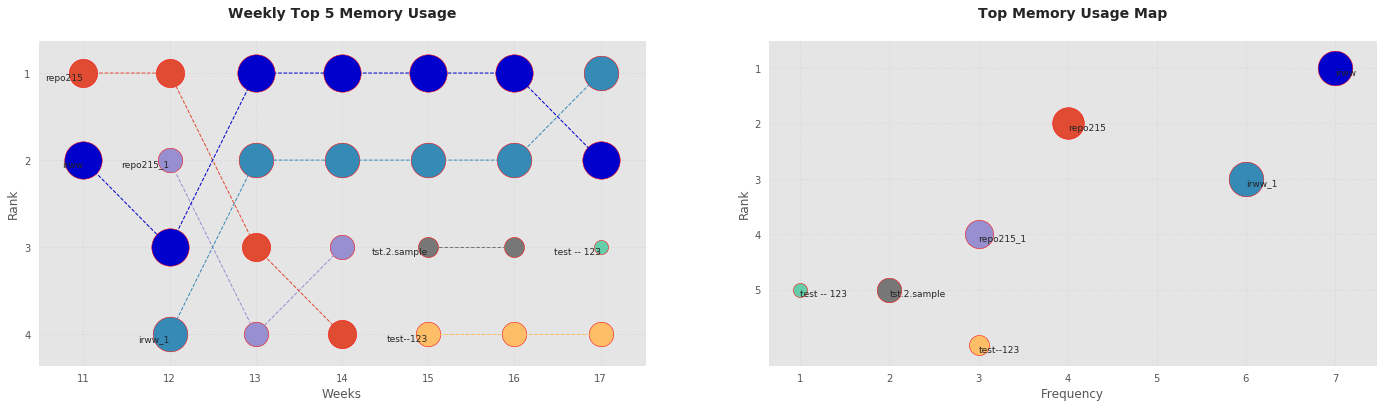

MEMORY_USAGE_GB  RANK
MONTH WEEK CONN_NAME                          
3     11   irww                     1.36     2
           repo215                  1.66     1
      12   irww                     1.40     3
           irww_1                   1.40     4
           repo215                  1.62     1
           repo215_1                1.50     2
      13   irww                     1.40     1
           irww_1                   1.40     2
           repo215                  1.35     3
           repo215_1                1.31     4
4     14   irww                     1.27     1
           irww_1                   1.27     2
           repo215                  0.66     4
           repo215_1                0.69     3
      15   irww                     1.28     1
           irww_1                   1.28     2
           test--123                0.70     4
           tst.2.sample             0.70     3
      16   irww                     1.47     1
           irww_1                   1.46     2
           test--123                1.28     4
           tst.2.sample             1.28     3
      17   irww                     1.47     2
           irww_1                   1.47     1
           test -- 123              0.76     3
           test--123                0.75     4

In [4]:
# load pandas for dataframe support
import pandas as pd

# input value of parameters to pull history data through repository view
queryCondition = "DB_CONN_ID='irww' END_TIME='2018-04-23-00:00:00' INTERVAL=30 REPORT_TYPE='memory'"

# pass the values to a variable
!echo $queryCondition > enterpriseCondition

# get content from the variable and pass values to select statement 
# run select statment to get Top 5 databases that were showing high Memory Usage by week and save as a CSV file
# display Top 5 databases that were showing high Memory Usage in each week in graph
%run enterprise-view-scripts.jupyter.ipynb

# set maximum rows of a table as general
pd.options.display.max_rows = 999

# define object for dataframe and pivot table
memory_df = None
memory_table = None

# check whether a CSV file has been created, which means select statement runs successfully
# pass content of CSV to dataframe object
# draw pivot table according to dataframe
if os.path.exists("memory.csv") and (len(GENERAL_ERROR) == 0):
    memory_df = pd.read_csv("memory.csv", index_col=0)
    memory_table = pd.pivot_table(memory_df, index = ['MONTH', 'WEEK', 'CONN_NAME'], fill_value=0)
    
# display pivot table    
memory_table